### Kepler Objects of Interest

A Kepler object of interest (KOI) is a star observed by the Kepler spacecraft that is suspected of hosting one or more transiting planets. [wiki]

In this notebook we perform an exploratory data analysis on the latest **Cumulative KOI Table** as taken from https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative . 

We first split the input file (cumulative.csv) into two seperate files containing *memo* and *table*. 

In [19]:
with open('cumulative.csv', 'r') as koi_file:
    koi_table = ''.join([line for line in koi_file.readlines()[53:]])
with open('cumulative.csv', 'r') as koi_file:    
    memo      = ''.join([line for line in koi_file.readlines()[:53]])

with open('koi_memo.txt', 'w') as memo_file:
    memo_file.write(memo)
with open('koi_table.csv', 'w') as table_file:
    table_file.write(koi_table)
    
print(memo[:501],'...')

# This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu
# Sun Jan 20 03:22:26 2019
#
# COLUMN kepid:          KepID
# COLUMN kepoi_name:     KOI Name
# COLUMN kepler_name:    Kepler Name
# COLUMN koi_disposition: Exoplanet Archive Disposition
# COLUMN koi_pdisposition: Disposition Using Kepler Data
# COLUMN koi_score:      Disposition Score
# COLUMN koi_fpflag_nt:  Not Transit-Like False Positive Flag
# COLUMN koi_fpflag_ss:  Stellar Eclipse False Positive ...


In [20]:
import pandas as pd

kdf = pd.read_csv('koi_table.csv')
kdf.head()

,loc_rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


Columns contain:
* id data

* **exoplanet or not** using kepler data + other data

* numerical features

* numerical feature error bounds

In [39]:
headers = list(kdf)

ids        = [x for x in headers if 'id' in x or '_name' in x]
isexop     = [x for x in headers if 'disposition' in x]  
flags      = [x for x in headers if 'flag_' in x]  
errors     = [x for x in headers if 'err' in x]
num_feats  = [x for x in headers if x not in ids+isexop+errors+flags]

print('\n num of headers:', len(headers))
print('\n id headers:', *ids, len(ids))
print('\n flag headers:', *flags, len(flags))
print('\n exopl headers:', *isexop, len(isexop))
print('\n num headers:', *num_feats, len(num_feats))
print('\n errors:', *errors, len(errors))



 num of headers: 50

 id headers: loc_rowid kepid kepoi_name kepler_name 4

 flag headers: koi_fpflag_nt koi_fpflag_ss koi_fpflag_co koi_fpflag_ec 4

 exopl headers: koi_disposition koi_pdisposition 2

 num headers: koi_score koi_period koi_time0bk koi_impact koi_duration koi_depth koi_prad koi_teq koi_insol koi_model_snr koi_tce_plnt_num koi_tce_delivname koi_steff koi_slogg koi_srad ra dec koi_kepmag 18

 errors: koi_period_err1 koi_period_err2 koi_time0bk_err1 koi_time0bk_err2 koi_impact_err1 koi_impact_err2 koi_duration_err1 koi_duration_err2 koi_depth_err1 koi_depth_err2 koi_prad_err1 koi_prad_err2 koi_teq_err1 koi_teq_err2 koi_insol_err1 koi_insol_err2 koi_steff_err1 koi_steff_err2 koi_slogg_err1 koi_slogg_err2 koi_srad_err1 koi_srad_err2 22


Some statistics for each column

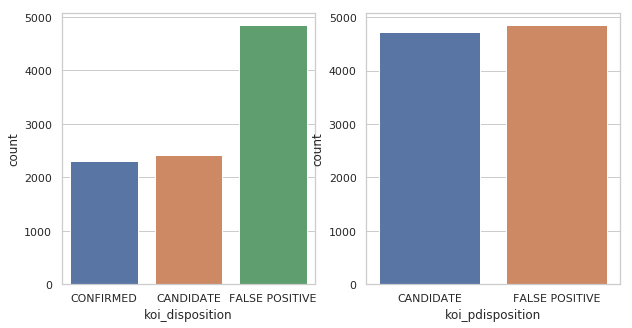

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
sns.set(style="whitegrid")

rcParams['figure.figsize'] = 10, 5
fig, axs = plt.subplots(ncols=2)
sns.countplot(x='koi_disposition', data=kdf, ax = axs[0])
sns.countplot(x='koi_pdisposition', data=kdf, ax = axs[1])
